<a href="https://colab.research.google.com/github/Priyaaa1/dog-vs-cat/blob/main/dogs_vs_cats_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:39<00:00, 31.0MB/s]
100% 1.06G/1.06G [00:39<00:00, 28.7MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [8]:
# generators
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
)
validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# normalize
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [10]:
# Creating CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 64s 80ms/step - loss: 0.6236 - accuracy: 0.6403 - val_loss: 0.5720 - val_accuracy: 0.7032
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 0.4829 - accuracy: 0.7637 - val_loss: 0.4690 - val_accuracy: 0.7750
Epoch 3/10
625/625 [==============================] - 48s 77ms/step - loss: 0.3987 - accuracy: 0.8144 - val_loss: 0.4573 - val_accuracy: 0.7884
Epoch 4/10
625/625 [==============================] - 48s 76ms/step - loss: 0.2974 - accuracy: 0.8710 - val_loss: 0.4865 - val_accuracy: 0.7988
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1809 - accuracy: 0.9260 - val_loss: 0.6829 - val_accuracy: 0.7724
Epoch 6/10
625/625 [==============================] - 47s 74ms/step - loss: 0.1047 - accuracy: 0.9605 - val_loss: 0.8949 - val_accuracy: 0.7664
Epoch 7/10
625/625 [==============================] - 47s 75ms/step - loss: 0.0744 - accuracy: 0.9736 - val_loss: 0.8823 - val_accuracy:

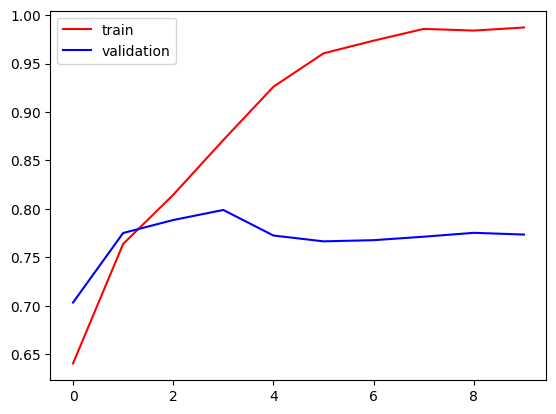

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()


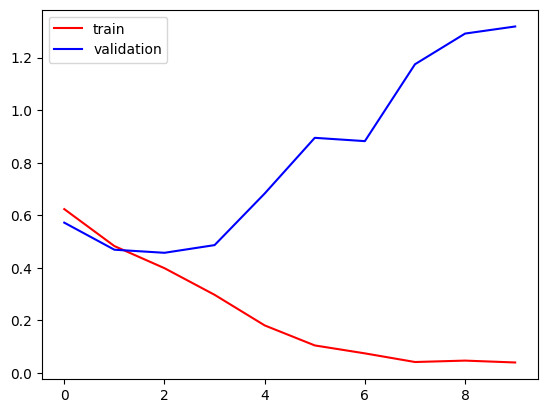

In [17]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()